In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Text(0, 0.5, 'time')

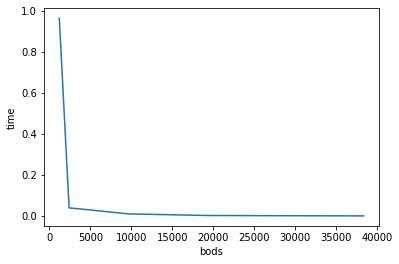

In [5]:
x = [1200, 2400, 4800, 9600, 14400, 19200, 28800,  38400]
# 1200 0.09647601650607202 +2
# 1200 0.1005186484410 +5
# 1200 0.10847118922 +10
# 2400 0.04463320512 +5
# 2400 0.040202956 +2
# 2400 0.0761976242 +10
# 4800 0.06265511879554161
# 4800 0.06672658239 +10
# 0.03074908
# 9600 0.0501135164 +2
# 9600 0.060534  +5
# 9600 0.062204837799 +10
# 0.0062289
# 0.010978698
# 14400 0.0574732927 +5
# 14400 0.050040783 +2
# 14400 0.060556343 +10
# 14400 0.059788533619 +10
# 0.007042
# 19200 0.0601439292 +5
# 19200 0.0496654818 +2
# 19200 0.059978416987 +10
# 28800 0.061054138 +5
# 28800 0.04946790 +2
# 28800 0.05909310068 +10
# time 0.0019946
# 38400 0.0606741 +5
# 38400 0.05024653 +2
# 38400 0.05871278899 +10
# 0.00099706
y = [0.964760165, 0.040202956, 0.03074908, 0.010978698, 0.007042, 0.003042, 0.0019946, 0.00099706 ]
# y = [0.10847118922, 0.0761976242, 0.06672658239, 0.062204837799, 0.060556343, 0.059978416987, 0.05909310068, 0.05871278899 ]

plt.plot(x, y)
plt.xlabel('bods')
plt.ylabel('time')


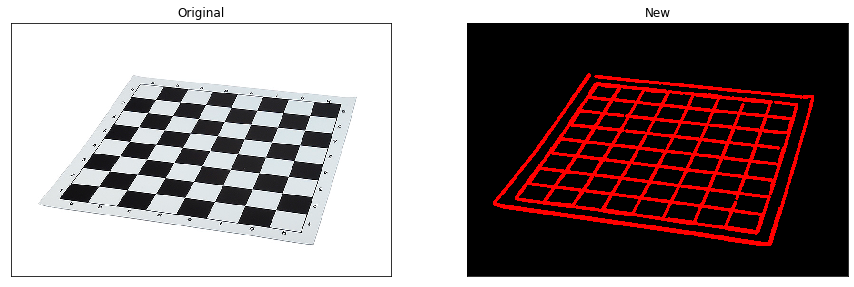

In [63]:
img = cv2.imread("D:\Striping.jpg")
img = cv2.imread("D:\chess.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 10  # minimum number of pixels making up a line
max_line_gap = 5  # maximum gap in pixels between connectable line segments
line_image = np.copy(img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
    
# Draw the lines on the  image
lines_edges = cv2.addWeighted(img, 0.8, line_image, 1, 0)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(line_image),plt.title('New')
plt.xticks([]), plt.yticks([])
plt.show()

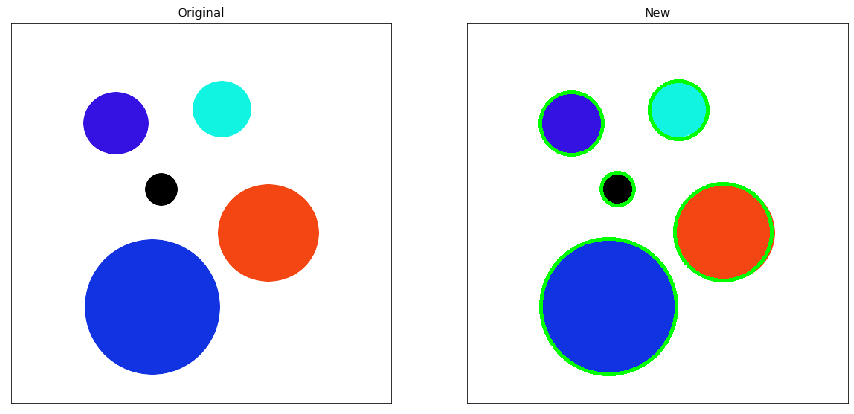

In [65]:
image = cv2.imread(("D:\circles.jpg"))
output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect circles in the image
# circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.2, 100)
circles = cv2.HoughCircles(gray,  
                   cv2.HOUGH_GRADIENT, 1, 30, param1 = 50, 
               param2 = 30, minRadius = 1, maxRadius = 100) 
# ensure at least some circles were found
if circles is not None:
	# convert the (x, y) coordinates and radius of the circles to integers
	circles = np.round(circles[0, :]).astype("int")
	# loop over the (x, y) coordinates and radius of the circles
	for (x, y, r) in circles:
		# draw the circle in the output image, then draw a rectangle
		# corresponding to the center of the circle
		cv2.circle(output, (x, y), r, (0, 255, 0), 4)
# 		cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
	# show the output image
# 	cv2.imshow("output", np.hstack([image, output]))
# 	cv2.waitKey(0)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output),plt.title('New')
plt.xticks([]), plt.yticks([])
plt.show()

In [80]:
def changeBritness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img
def changeContrast(image, alpha = 1.5):
    beta = 0 # Brightness control (0-100)
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted
    
methods = ['cv2.TM_CCOEFF']
#            , 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR'
#         ,'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
def matchTemp(img, template):
    k, w, h = template.shape[::-1]
    for meth in methods:
    #     img = img2.copy()
        method = eval(meth)

        # Apply template Matching
        res = cv2.matchTemplate(img,template,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)

        cv2.rectangle(img,top_left, bottom_right, 255, 2)
        plt.figure(figsize=(15,5))
    #     plt.plot
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(img,cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        plt.suptitle(meth)

        plt.show()

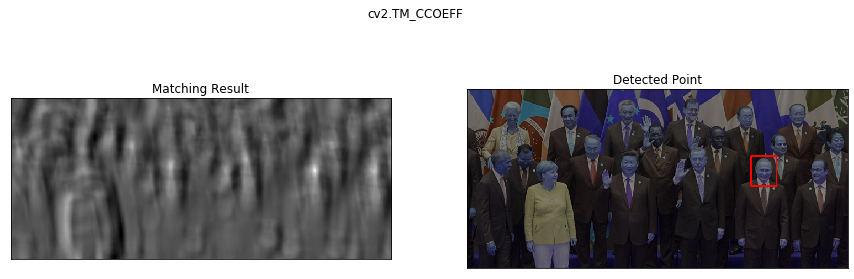

In [81]:
img = cv2.imread("D:\g20.jpg")
template = cv2.imread("D:\putin.jpg")
img = changeContrast(img, 0.5)
matchTemp(img, template)

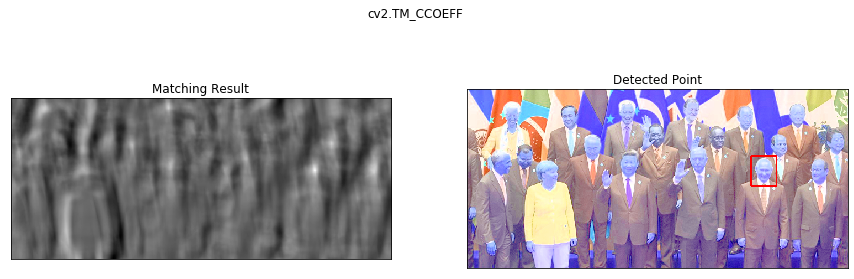

In [82]:
img = cv2.imread("D:\g20.jpg")
img = changeBritness(img, 110)
matchTemp(img, template)

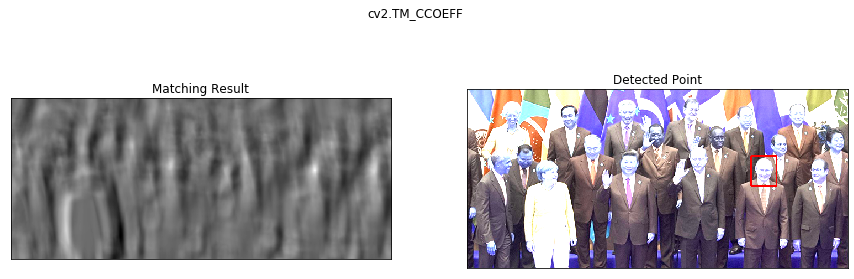

In [83]:
img = cv2.imread("D:\g20.jpg")
img = changeContrast(img, 2)
matchTemp(img, template)

In [84]:
def addNoize(img, lvl):
    filtered = img + lvl
    return filtered
    

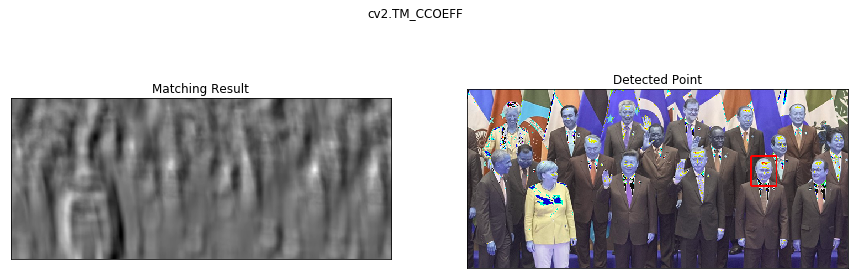

In [85]:
img = cv2.imread("D:\g20.jpg")
img = addNoize(img, 20)
matchTemp(img, template)

In [86]:
from scipy import ndimage
# def rotateImg(img, angle):
#     return cv2.rotate(img, angle) 
def rotateImg( image, angle ):
    rotated = ndimage.rotate(image, angle)
    return rotated

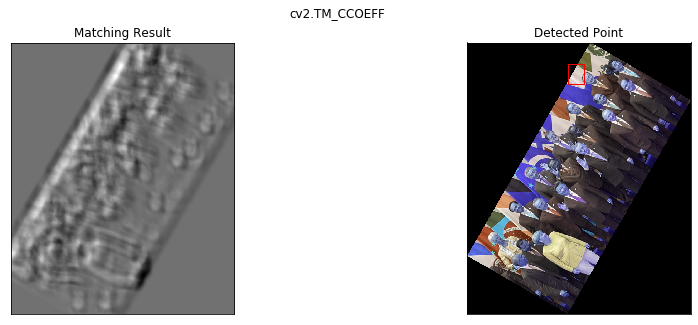

In [87]:
img = cv2.imread("D:\g20.jpg")
img = rotateImg(img, 60)
matchTemp(img, template)

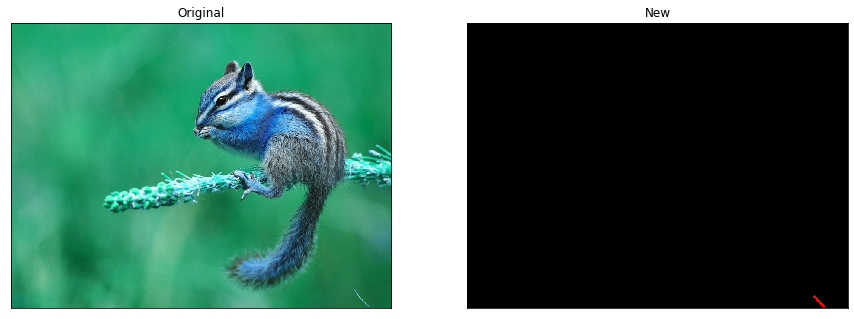

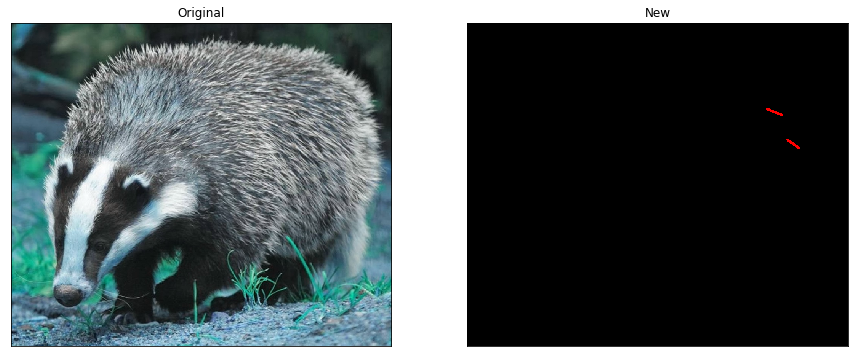

In [64]:
img2 = cv2.imread("D:\Barsuk-1.jpg")
img1 = cv2.imread("D:\sukk1.jpg")

gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

kernel_size = 5
blur_gray1 = cv2.GaussianBlur(gray1,(kernel_size, kernel_size),0)
blur_gray2 = cv2.GaussianBlur(gray2,(kernel_size, kernel_size),0)

low_threshold = 200
high_threshold = 350
edges1 = cv2.Canny(blur_gray1, low_threshold, high_threshold)
edges2 = cv2.Canny(blur_gray2, low_threshold, high_threshold)

rho = 5  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 25  # minimum number of pixels making up a line
max_line_gap = 4  # maximum gap in pixels between connectable line segments
line_image1 = np.copy(img1) * 0  # creating a blank to draw lines on
line_image2 = np.copy(img2) * 0

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines1 = cv2.HoughLinesP(edges1, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)
lines2 = cv2.HoughLinesP(edges2, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

for line in lines1:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image1,(x1,y1),(x2,y2),(255,0,0),5)
for line in lines2:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image2,(x1,y1),(x2,y2),(255,0,0),5)
    
# Draw the lines on the  image
lines_edges1 = cv2.addWeighted(img1, 0.8, line_image1, 1, 0)
lines_edges2 = cv2.addWeighted(img2, 0.8, line_image2, 1, 0)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img1),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(line_image1),plt.title('New')
plt.xticks([]), plt.yticks([])

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img2),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(line_image2),plt.title('New')
plt.xticks([]), plt.yticks([])
plt.show()

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

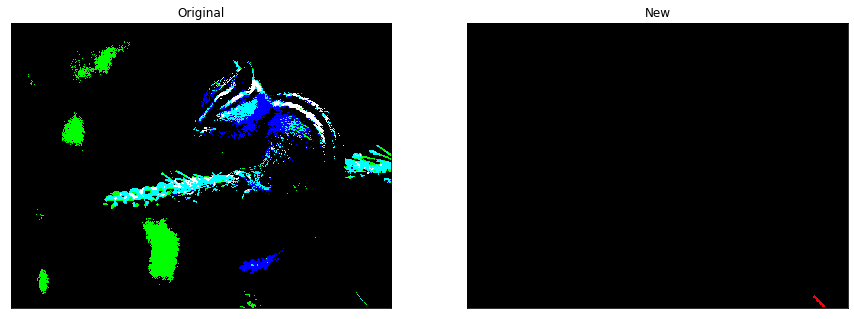

In [60]:
img = cv2.imread("D:\sukk1.jpg")
ret,img = cv2.threshold(img,180,255,0)

element = cv2.getStructuringElement(cv2.MORPH_CROSS,(6,6))
eroded = cv2.erode(img,element)
dilate = cv2.dilate(eroded, element)
skeleton = cv2.subtract(img, dilate)
gray = cv2.cvtColor(skeleton,cv2.COLOR_BGR2GRAY)

minLineLength = 20
maxLineGap = 1
boundaries = [
	([17, 15, 100], [50, 56, 200]),
	([86, 31, 4], [220, 88, 50]),
	([25, 146, 190], [62, 174, 250]),
	([103, 86, 65], [145, 133, 128])
]
for (lower, upper) in boundaries:
	# create NumPy arrays from the boundaries
	lower = np.array(lower, dtype = "uint8")
	upper = np.array(upper, dtype = "uint8")
    mask = cv2.inRange(img, lower, upper)
    output = cv2.bitwise_and(image, image, mask = mask)

lines = cv2.HoughLinesP(gray, rho=5, theta=np.pi/180, threshold=10, minLineLength=20, maxLineGap=1)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(line_image1),plt.title('New')
plt.xticks([]), plt.yticks([])

In [61]:
def changeBritness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img
def changeContrast(image, alpha = 1.5):
    beta = 0 # Brightness control (0-100)
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted
    
methods = ['cv2.TM_CCOEFF']
#            , 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR'
#         ,'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
def matchTemp(img, template):
    k, w, h = template.shape[::-1]
    for meth in methods:
    #     img = img2.copy()
        method = eval(meth)

        # Apply template Matching
        res = cv2.matchTemplate(img,template,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
    
        cv2.rectangle(img,top_left, bottom_right, 255, 2)
        plt.figure(figsize=(15,5))
    #     plt.plot
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(img,cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        plt.suptitle(meth)

        plt.show()
#         threshold = 0.8
#         if (min_val < threshold):
#             return False
#         else: return True
        return min_val

In [70]:
img = cv2.imread("D:\sukk1.jpg")
template1 = cv2.imread("D:\BarsukTemp.jpg")
template2 = cv2.imread("D:\burTemp.jpg")
cv2.imshow("Image", template2)
cv2.waitKey(0)
cv2.destroyAllWindows()
res1 = matchTemp(img, template1)
print(res1)
res2 = matchTemp(img, template2)
if (res2>res1):
    print ('brnd')
else:
    print('barsuk')

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-2b5g8ysb\opencv\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'
